# Notebook ini dikerjakan oleh: Prayoga Agusto Haradi, Batch HCK-004 untuk pengerjaan Milestone 2 pada Phase 1

## Latar Belakang

Notebook ini akan membahas mengenai pentingnya membuat model klasifikasi untuk memprediksi apakah pelanggan akan membatalkan reservasi hotel mereka atau tidak. Reservasi hotel yang dibatalkan dapat menjadi masalah bagi hotel karena mereka mungkin harus mengembalikan deposit atau menanggung biaya pembatalan. Selain itu, pembatalan reservasi dapat menyebabkan pengalokasian sumber daya yang tidak optimal seperti staf dan inventaris. 

Namun, dengan memprediksi pembatalan reservasi dengan akurat, hotel dapat mengambil tindakan proaktif untuk mengurangi biaya dan memperbaiki pengalokasian sumber daya, serta meningkatkan pengalaman pelanggan dan meningkatkan pendapatan melalui promosi last-minute untuk mengisi kamar yang kosong. Oleh karena itu, pembuatan model klasifikasi yang dapat memprediksi pembatalan reservasi dengan akurat merupakan hal yang penting bagi hotel untuk memperoleh keuntungan kompetitif dan meningkatkan efisiensi operasional mereka.

## Tujuan Notebook

Berdasarkan latar belakang, tujuan notebook ini adalah untuk mengembangkan model prediktif yang secara akurat mengidentifikasi kemungkinan pelanggan membatalkan reservasi hotel mereka, dengan menggunakan data historis tentang perilaku pelanggan dan detail reservasi. Model ini dapat membantu hotel untuk mengambil tindakan proaktif untuk mengatasi masalah pelanggan, mengoptimalkan alokasi sumber daya, dan mengurangi biaya yang terkait dengan pembatalan sekaligus meningkatkan pengalaman pelanggan secara keseluruhan.

## Info Dataset

Dataset yang digunakan adalah dataset klasifikasi hotel yang berisi informasi tentang reservasi hotel dan apakah reservasi tersebut dibatalkan atau tidak. Dataset ini terdiri dari 36274 baris dan 18 kolom, termasuk fitur-fitur seperti:

- Booking_ID: ID tamu yang melakukan reservasi
- booking_status: apakah reservasi dibatalkan (1) atau tidak (0)
- lead_time: jumlah hari antara tanggal pemesanan dan tanggal kedatangan tamu
- arrival_date_year, arrival_date_month, dan arrival_date: tanggal kedatangan tamu
- no_in_weekend_nights: jumlah malam tamu tinggal di hotel selama akhir pekan (Jumat, Sabtu, atau Minggu)
- no_of_week_nights: jumlah malam tamu tinggal di hotel selama hari kerja (Senin hingga Kamis)
- type_of_meal_plan: tipe makanan yang dipesan 
- adults: jumlah tamu dewasa
- children: jumlah tamu anak-anak
- market_segment: segmen pasar (Online, Offline, etc)
- repeated_guest: apakah tamu adalah tamu yang telah menginap di hotel sebelumnya (1) atau tidak (0)
- no_of_previous_bookings_not_canceled: jumlah reservasi yang tidak dibatalkan oleh tamu sebelumnya sebelum reservasi saat ini
- room_type_reserved: tipe kamar yang dipesan oleh tamu
- avg_price_per_room: tarif rata-rata per kamar per malam
- required_car_parking_space: jumlah tempat parkir mobil yang dipesan oleh tamu
- no_of_special_requests: jumlah permintaan khusus yang dilakukan oleh tamu.

Dataset ini dapat digunakan untuk mengembangkan model yang dapat memprediksi apakah reservasi akan dibatalkan atau tidak berdasarkan karakteristik tamu dan reservasi tersebut. 


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
from yellowbrick.classifier import ConfusionMatrix
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

## Data Loading

Melakukan data loading menggunakan pd.read_csv dan menunjukkan 10 data pertama dan terakhir menggunakan df.head dan df.tail

In [3]:
df = pd.read_csv("Hotel Reservations.csv")

In [4]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [5]:
df.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


## Exploratory Data Analysis (EDA)

Kita akan memulai EDA dengan melihat informasi pada dataframe menggunakan df.info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Selanjutnya, kita akan melihat mean, percentile, min, dan max pada data numerik untuk mendapat gambaran awal data

In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Kita akan mengecek semua nilai unik pada dataset kita untuk menentukan kolom kategorik dan kolom numerik

In [8]:
#Mengecek unik value pada semua kolom
for (columnName, columnData) in df.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.unique())

Column Name :  Booking_ID
Column Contents :  ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
Column Name :  no_of_adults
Column Contents :  [2 1 3 0 4]
Column Name :  no_of_children
Column Contents :  [ 0  2  1  3 10  9]
Column Name :  no_of_weekend_nights
Column Contents :  [1 2 0 4 3 6 5 7]
Column Name :  no_of_week_nights
Column Contents :  [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
Column Name :  type_of_meal_plan
Column Contents :  ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Column Name :  required_car_parking_space
Column Contents :  [0 1]
Column Name :  room_type_reserved
Column Contents :  ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Column Name :  lead_time
Column Contents :  [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86

Berdasarkan output diatas, kita dapat melihat bahwa kolom kategori pada dataset ini adalah:
- no of adults
- no_of_children
- no_of_weekend_nights
- no_of_week_nights
- type_of_meal_plan
- required_car_parking_space
- room_type_reserved
- arrival_year
- arrival_month
- arrival_date
- market_segment_type
- repeated_guest
- no_of_previous_cancellations
- no_of_previous_bookings_not_canceled
- no_of_special_requests
- booking_status

Selanjutnya, kita akan mengecek data duplikat pada dataframe.

In [9]:
df[df.duplicated(keep=False)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [10]:
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Terlihat pada dataframe kita ada 13413 data yang terduplikat, sehingga kita akan menyimpan data duplikat yang muncul pertama dan ngedrop data duplikat lainnnya. Sehingga, dataframe kita berubah dari 36275 data menjadi 26000 data.

#### Visualization

<Axes: title={'center': 'Orders by Arrival Year'}, xlabel='arrival_year', ylabel='count'>

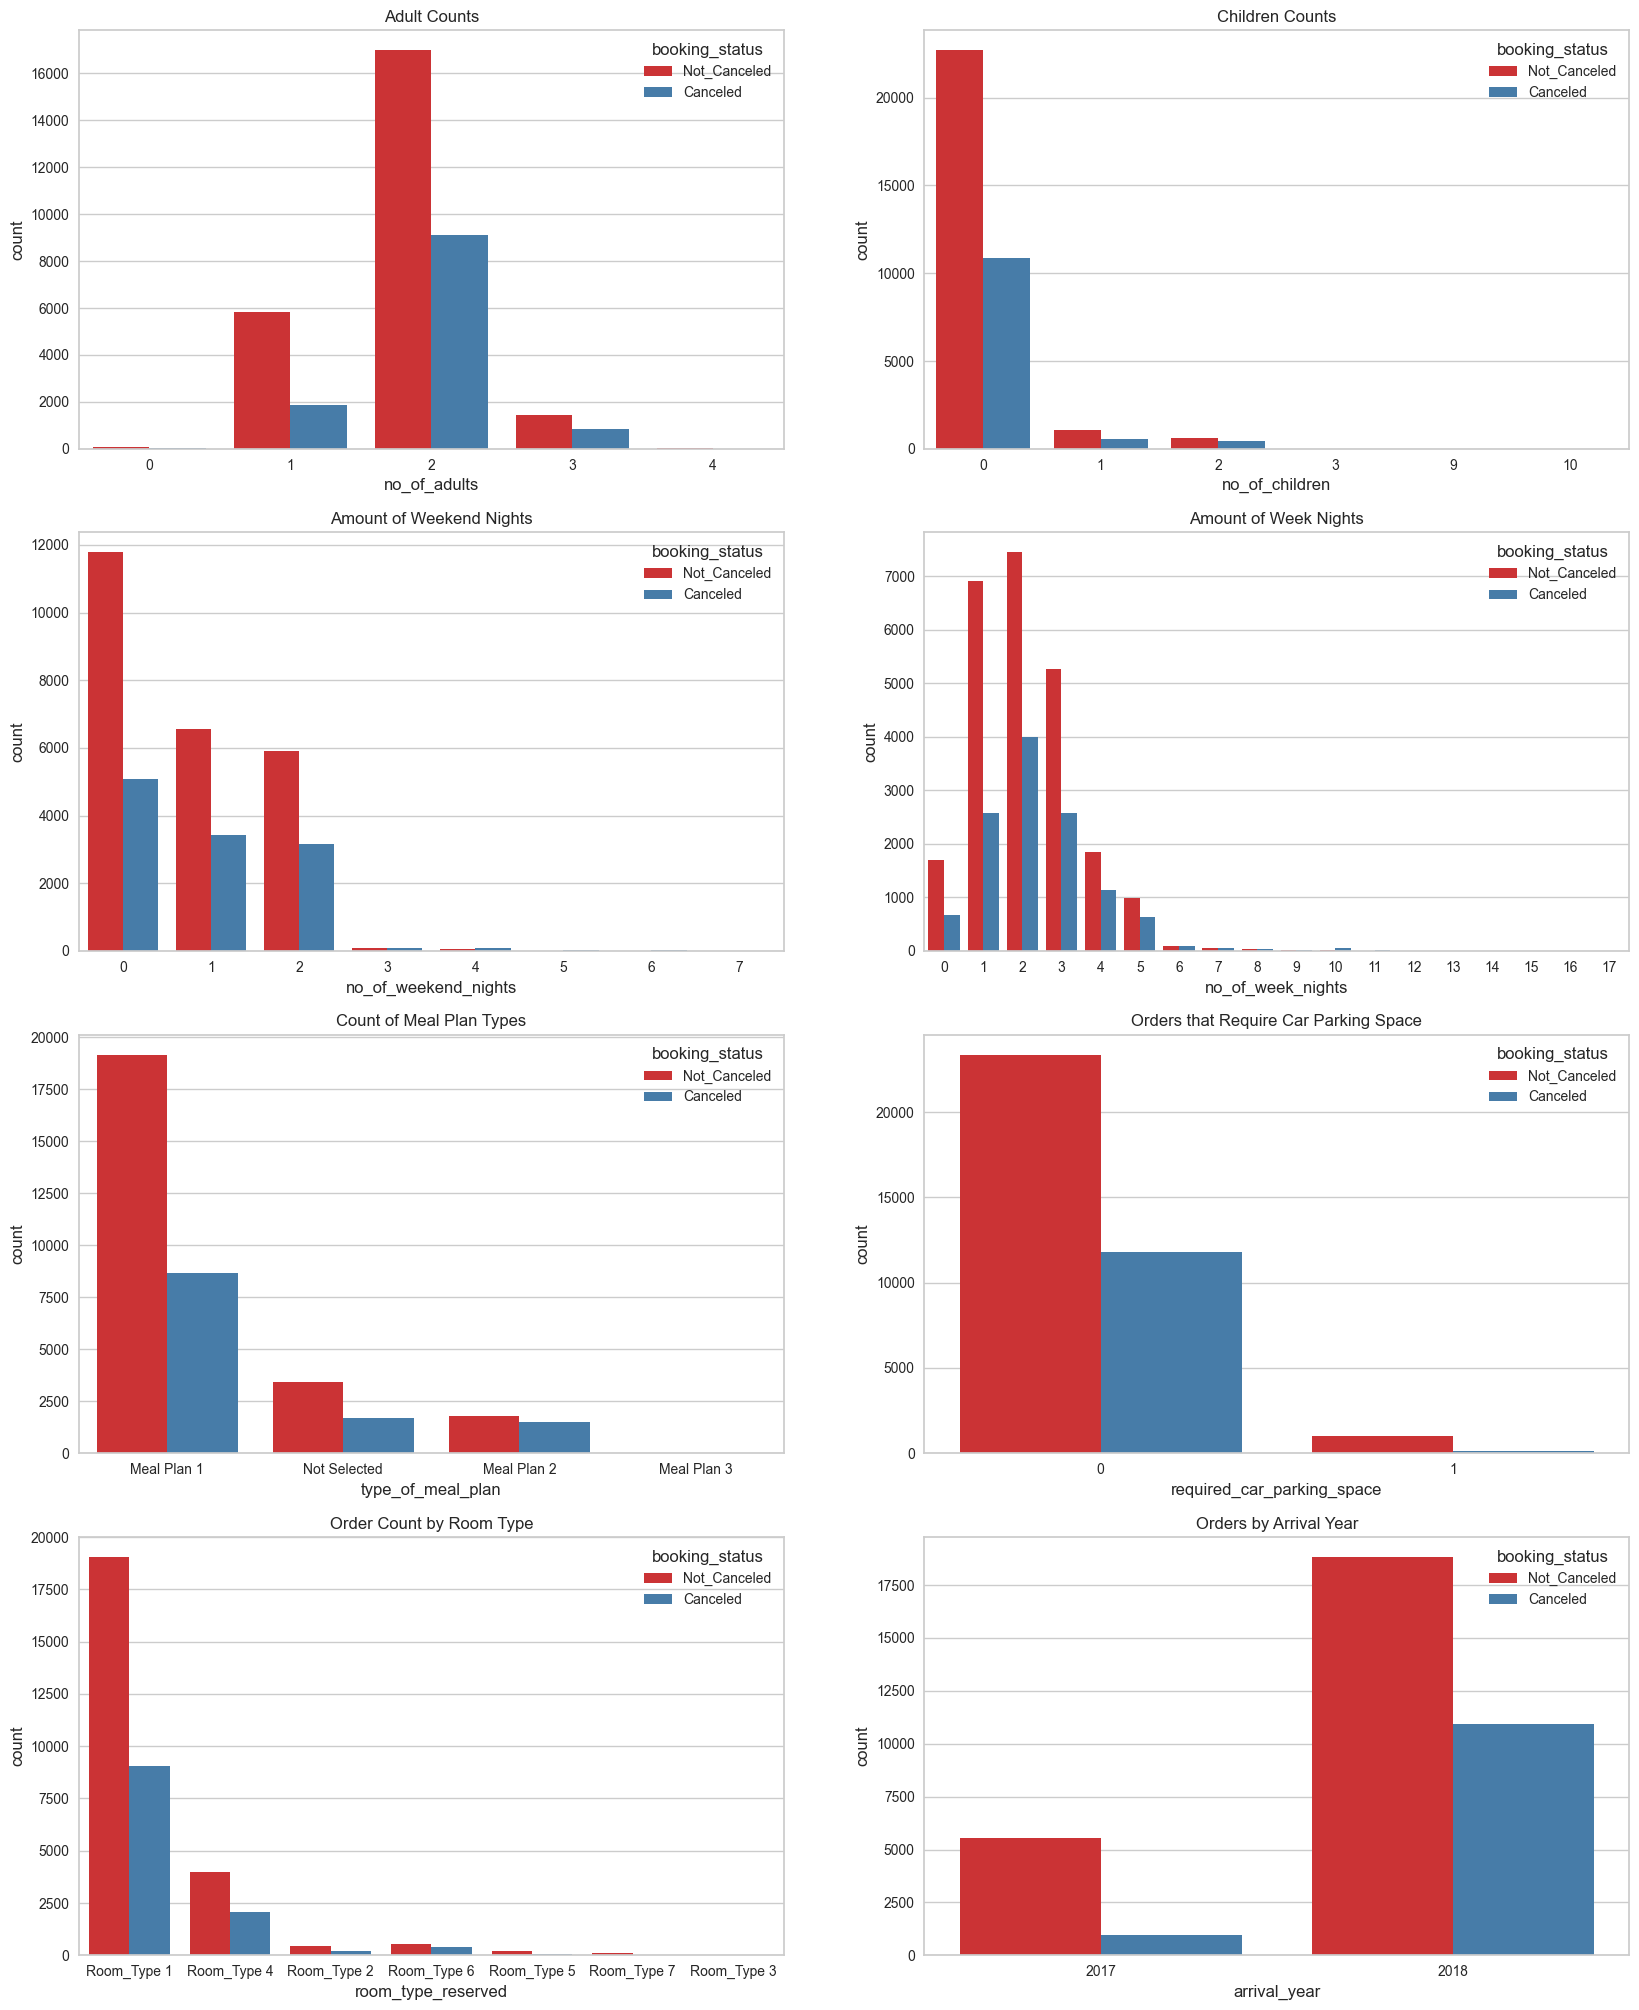

In [12]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Adult Counts')
sns.countplot(x = 'no_of_adults',hue='booking_status', palette = 'Set1', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Children Counts')
sns.countplot(x = 'no_of_children', hue='booking_status',palette = 'Set1', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Amount of Weekend Nights')
sns.countplot(x = 'no_of_weekend_nights', hue='booking_status',palette = 'Set1', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Amount of Week Nights')
sns.countplot(x = 'no_of_week_nights', hue='booking_status',palette = 'Set1', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Count of Meal Plan Types')
sns.countplot(x = 'type_of_meal_plan', hue='booking_status',palette = 'Set1', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Orders that Require Car Parking Space')
sns.countplot(x = 'required_car_parking_space', hue='booking_status',palette = 'Set1', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Order Count by Room Type')
sns.countplot(x = 'room_type_reserved', hue='booking_status',palette = 'Set1', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Orders by Arrival Year')
sns.countplot(x = 'arrival_year', hue='booking_status',palette = 'Set1', data = df)

Berdasarkan bar plot diatas, kita dapat menyimpulkan bahwa kolom no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, dan arrival_year tidak terlalu mempengaruhi apabila pelanggan akan membatalkan reservasinya. Hal tersebut dapat dilihat berdasarkan perbandingan antara Not_Canceled dan Canceled yang sama pada semua bar plot, sehingga kita dapat menyimpulkan bahwa berapapun nilai dari delapan kolom tersebut, proporsi Not_Canceled dan Canceled akan selalu sama.

In [13]:
df_nc = df[df['booking_status'] == 'Not_Canceled']
df_c = df[df['booking_status'] == 'Canceled']

Text(0.5, 1.0, 'Lead Time untuk Pelanggan yang Tidak Cancel')

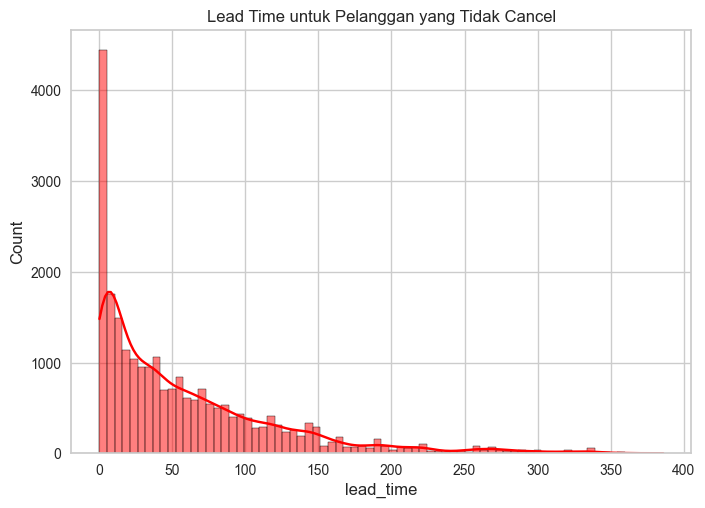

In [14]:
sns.histplot(data=df_nc, x=df_nc['lead_time'],color='red',kde=True).set_title('Lead Time untuk Pelanggan yang Tidak Cancel')

Text(0.5, 1.0, 'Lead Time untuk Pelanggan yang Cancel')

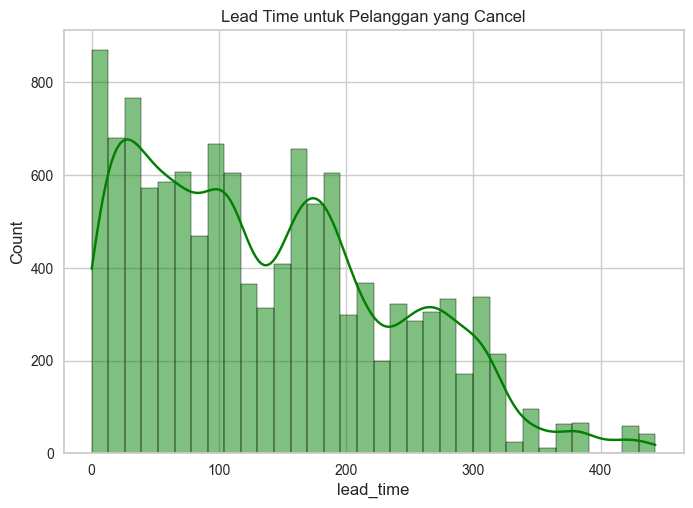

In [15]:
sns.histplot(data=df_c, x=df_c['lead_time'],color='green',kde=True).set_title('Lead Time untuk Pelanggan yang Cancel')

Berdasarkan kedua histplot tersebut, kita dapat menyimpulkan bahwa pelanggan yang mempunyai lead time yang lebih tinggi mempunyai kemungkinan yang lebih tinggi untuk membatalkan reservasinya. Hal ini terlihat dengan distribusi lead_time tinggi (lead_time > 150) juga mempunyai count yang tinggi pada reservasi yang dicancel, sedangkan untuk reservasi yang tidak dicancel cenderung mempunyai count yang rendah pada lead_time yang tinggi (lead_time > 150)

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

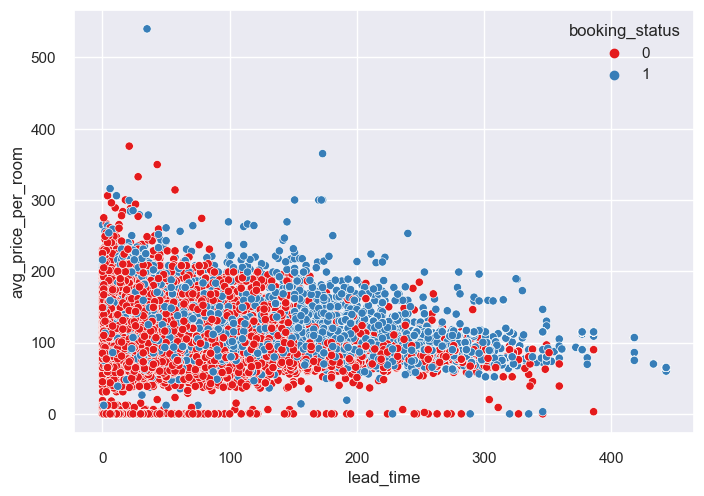

In [81]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set1', hue = 'booking_status')

Berdasarkan scatterplot diatas, kita dapat menyimpulkan bahwa reservasi akan lebih sering dibatalkan apabila lead_time yang lebih tinggi. avg_price_per_room hanya mempengaruhi booking_status apabila lead_time sudah mencapai titik tertentu, pada scatterplot diatas apabila lead_time diatas 150, kita dapat melihat bahwa semakin tinggi average price pada kamar, semakin tinggi kemungkinan untuk membatalkan reservasi. Hal ini dapat disebabkan oleh pelanggan yang mempunyai ekspektasi yang tinggi pada kamarnya, sehingga mereka akan lebih mungkin untuk membatalkan reservasi apabila ekspektasinya tidak tercapai.

#### Correlation

In [17]:
df2 = df.copy()
df2['booking_status'] = df2['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

<Axes: >

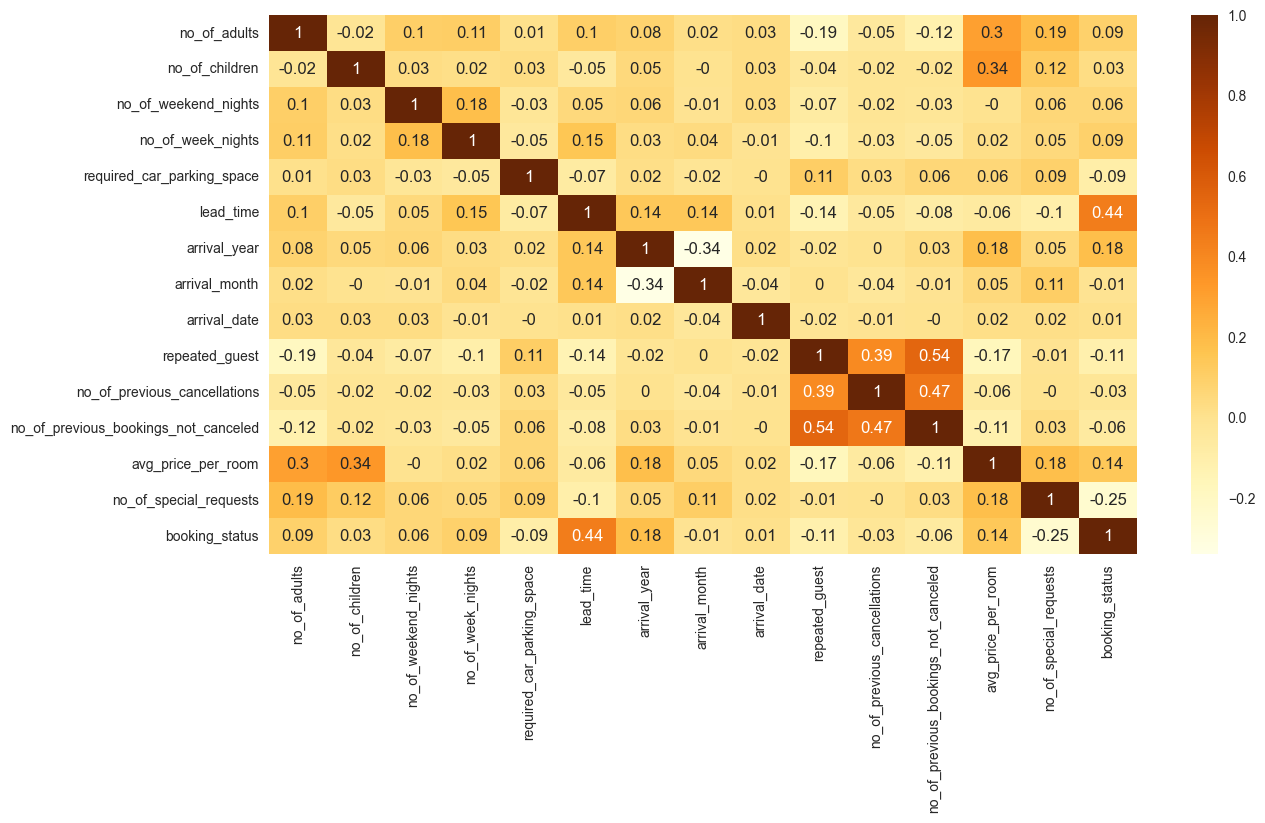

In [18]:
corr_matrix = df2.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlOrBr')

Berdasarkan korelasi pearson diatas, beberapa kolom yang berhubungan dengan booking status adalah:
- avg_price_per_room
- no_of_special_requests
- lead_time
- arrival_year

Selain itu, kita dapat melihat bahwa data kita tidak terlalu berkorelasi antar feature, sehingga data tidak ada multicollinearity yang perlu dihandle.

Untuk pemilihan feature yang akan dipakai dengan penjelasan pemakaiannya, akan dilihat menggunakan feature selection pada bagian feature engineering.

#### Insight EDA

Kesimpulan yang dapat diambil berdasarkan EDA yang sudah dilakukan adalah:
- Berdasarkan korelasi pearson, kolom yang paling berhubungan dengan booking status adalah: avg_price_per_room, no_of_special_requests,lead_time, arrival_year.

- Semakin tinggi lead_time, semakin tinggi kemungkinan pelanggan untuk membatalkan reservasinya.

- Semakin tinggi avg_price_per_room, semakin tinggi kemungkinan pelanggan untuk membatalkan reservasinya. Hal ini dapat disebabkan oleh pelanggan yang mempunyai ekspektasi yang tinggi pada kamarnya, sehingga mereka akan lebih mungkin untuk membatalkan reservasi apabila ekspektasinya tidak tercapai.

- kolom no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, dan arrival_year tidak terlalu mempengaruhi apabila pelanggan akan membatalkan reservasinya.

## Feature Engineering

#### Train-Test Split

Kita akan ngedrop kolom Booking ID, dan kemudian melakukan train test split dengan X adalah semua kolom selain booking status, dan Y adalah kolom booking status.

In [19]:
df = df.drop('Booking_ID', axis = 1)

In [20]:
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [21]:
X = df.drop(['booking_status'],axis=1)
y = df['booking_status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=42)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (36275, 17) (36275,) 
Training set  --->  (25392, 17) (25392,) 
Testing set   --->  (10883, 17)  (10883,)


In [23]:
y_train.value_counts()

0    17114
1     8278
Name: booking_status, dtype: int64

Berdasarkan value counts, kita melihat bahwa data kita imbalanced, sehingga perlu dilakukan oversampling. Oversampling akan dilakukan pada pipeline model menggunakan metode SMOTE.

#### Outlier Handling

Text(0.5, 1.0, 'avg_price_per_room Box Plot')

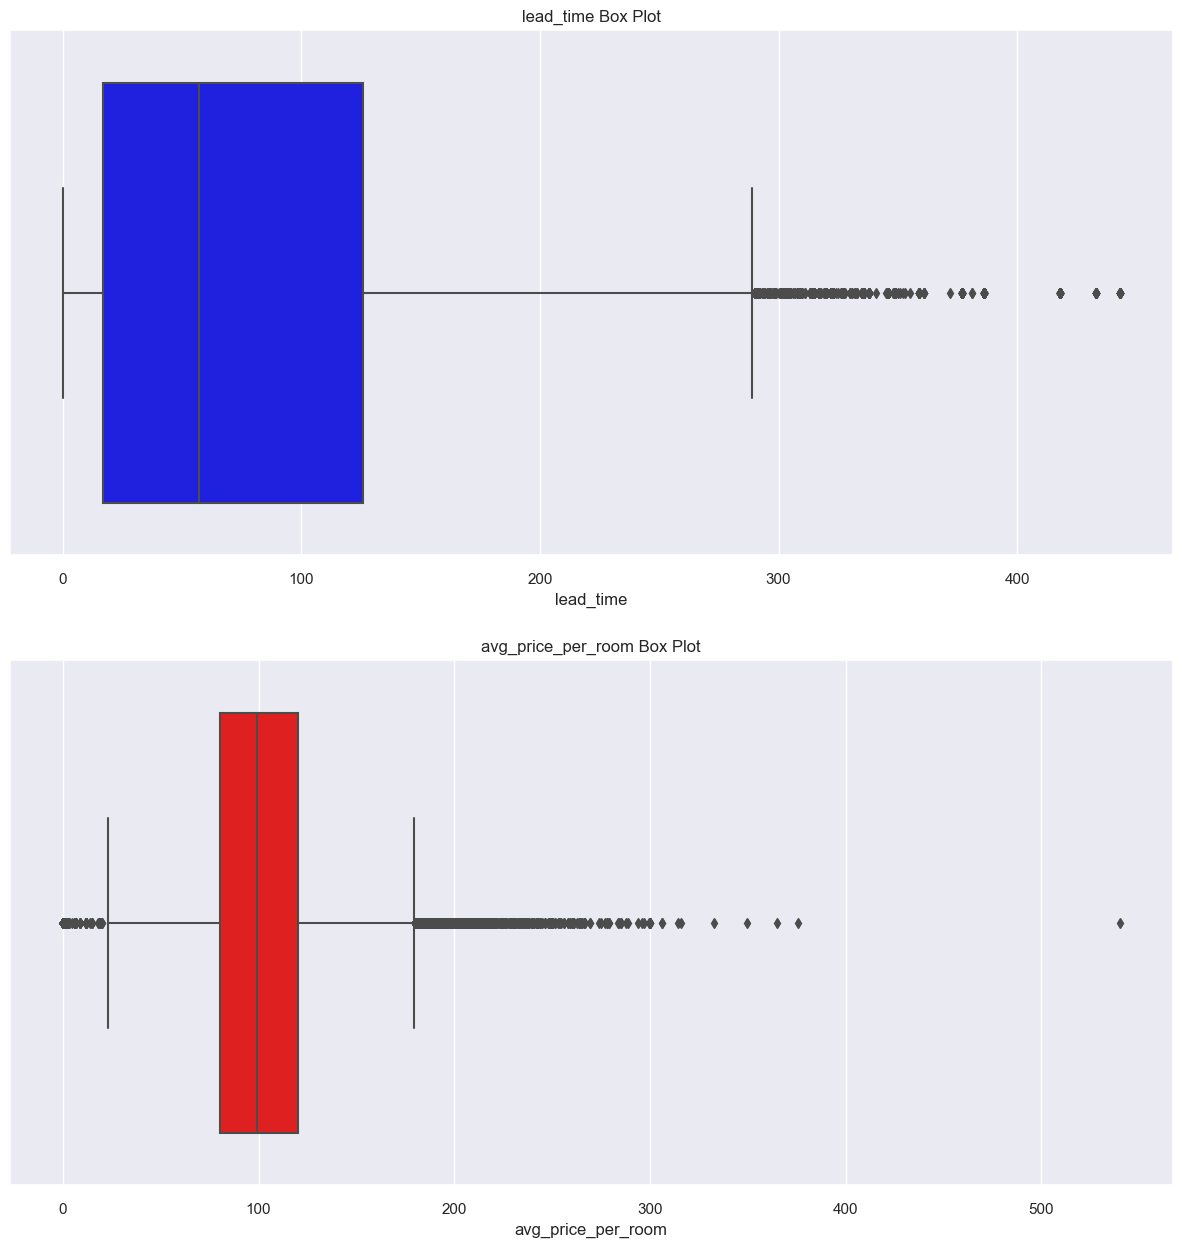

In [24]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

sns.boxplot(x=df['lead_time'],data=df, color="blue",ax=axs[0]).set_title('lead_time Box Plot')
sns.boxplot(x=df['avg_price_per_room'],data=df, color="red",ax=axs[1]).set_title('avg_price_per_room Box Plot')

In [25]:
def is_outlier(s):
    '''fungsi ini bertujuan untuk melakukan outlier handling pada nilai profit tiap region'''
    q75, q25 = np.percentile(df[str(s)] , [75 ,25])
    if df[str(s)].skew() > 1:
        upper_limit = q75 + 3*(q75-q25)
        lower_limit = q25 - 3*(q75-q25)
    elif (df[str(s)].skew() > 0.5) & (df[str(s)].skew() <= 1):
        upper_limit = q75 + 1.5*(q75-q25)
        lower_limit = q25 - 1.5*(q75-q25)
    else:
        upper_limit = df[str(s)].mean() + 3*df[str(s)].std()
        lower_limit = df[str(s)].mean() - 3*df[str(s)].std()
    return len(df.loc[(df[str(s)] > upper_limit) | (df[str(s)] < lower_limit) ])

In [26]:
print("Percentage outlier in lead_time:",is_outlier('lead_time')/len(df)*100,"%")
print("Percentage outlier in avg_price_per_room:",is_outlier('avg_price_per_room')/len(df)*100,"%")

Percentage outlier in lead_time: 0.0 %
Percentage outlier in avg_price_per_room: 4.6753962784286704 %


Berdasarkan outlier handling yang dilakukan diatas, kita tidak akan meng-handle outlier karena outlier tersebut menunjukkan data populasi asli (bukan error/misinput). Sehingga, data kita akan dilakukan training dengan outlier untuk dapat memprediksi apabila data test atau data baru yang ingin diprediksi juga mempunyai outlier.

#### Feature Selection

In [27]:
label_encoder = LabelEncoder()
X_train_feature_select = X_train.copy()
X_train_feature_select['type_of_meal_plan'] = label_encoder.fit_transform(X_train_feature_select['type_of_meal_plan'])
X_train_feature_select['room_type_reserved'] = label_encoder.fit_transform(X_train_feature_select['room_type_reserved'])
X_train_feature_select['market_segment_type'] = label_encoder.fit_transform(X_train_feature_select['market_segment_type'])

In [28]:
mutual_info = mutual_info_classif(X_train_feature_select, y_train)
mutual_info

array([0.00915155, 0.00136525, 0.00730163, 0.00891949, 0.00512477,
       0.0036397 , 0.00245466, 0.12766685, 0.02358514, 0.02495343,
       0.0022711 , 0.0172322 , 0.00593312, 0.00769799, 0.00703645,
       0.09054057, 0.0397846 ])

In [29]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

lead_time                               0.127667
avg_price_per_room                      0.090541
no_of_special_requests                  0.039785
arrival_month                           0.024953
arrival_year                            0.023585
market_segment_type                     0.017232
no_of_adults                            0.009152
no_of_week_nights                       0.008919
no_of_previous_cancellations            0.007698
no_of_weekend_nights                    0.007302
no_of_previous_bookings_not_canceled    0.007036
repeated_guest                          0.005933
type_of_meal_plan                       0.005125
required_car_parking_space              0.003640
room_type_reserved                      0.002455
arrival_date                            0.002271
no_of_children                          0.001365
dtype: float64

Berdasarkan analisis korelasi yang dilakukan pada EDA dan mutual info classif yang dilakukan pada training data, terlihat bahwa "lead_time", "avg_price_per_room", "no_of_special_requests", dan "market_segment_type" merupakan kolom-kolom yang berkorelasi paling kuat dengan kolom "booking_status".

Berikut ini adalah alasan mengapa kolom-kolom tersebut berkorelasi kuat dengan booking_status:

- "lead_time": Kolom ini mewakili jumlah hari antara tanggal pemesanan dan tanggal kedatangan. Ada kemungkinan bahwa pelanggan yang memesan lebih jauh sebelumnya lebih mungkin untuk membatalkan reservasi mereka, yang akan menghasilkan korelasi yang lebih tinggi dengan status pemesanan. Selain itu, pelanggan yang memesan lebih jauh sebelumnya mungkin memiliki pola atau preferensi pemesanan yang berbeda, yang dapat memengaruhi kemungkinan mereka untuk benar-benar menyelesaikan pemesanan mereka.

- "avg_price_per_room": Kolom ini menunjukkan harga rata-rata per kamar untuk pemesanan tertentu. Ada kemungkinan bahwa pelanggan yang bersedia membayar harga yang lebih rendah untuk kamar mereka lebih mungkin untuk menyelesaikan reservasi mereka dan datang untuk menginap. Beberapa alasan yang dapat menyebabkan ini adalah: Pelanggan yang bersedia membayar harga yang lebih tinggi untuk kamar mereka mungkin memiliki ekspektasi yang lebih tinggi untuk masa inap mereka, dan mungkin lebih mungkin untuk membatalkan reservasi mereka jika mereka merasa ekspektasi mereka tidak terpenuhi, pelanggan yang bersedia membayar harga yang lebih tinggi untuk kamar mereka mungkin memiliki lebih banyak fleksibilitas dalam rencana perjalanan mereka, dan kemungkinan besar akan membatalkan reservasi mereka jika rencana mereka berubah atau jika mereka menemukan penawaran yang lebih baik di tempat lain.

- "no_of_special_requests": Kolom ini menunjukkan jumlah permintaan khusus yang dibuat oleh pelanggan untuk reservasi mereka, seperti meminta tipe kamar tertentu atau meminta fasilitas tambahan. Ada kemungkinan bahwa pelanggan yang membuat lebih banyak permintaan khusus akan lebih berinvestasi dalam reservasi mereka dan lebih mungkin untuk menyelesaikan masa inap mereka.

- "market_segment_type": Kolom ini mewakili segmen pasar yang dimiliki pelanggan, seperti "Corporate" atau "Online". Ada kemungkinan bahwa segmen pasar tertentu lebih dapat diandalkan atau memiliki kecenderungan yang lebih tinggi untuk menyelesaikan reservasi mereka, yang akan menghasilkan korelasi yang lebih tinggi dengan status pemesanan. Selain itu, pelanggan di segmen pasar yang berbeda mungkin memiliki pola atau preferensi pemesanan yang berbeda, yang juga dapat memengaruhi kemungkinan mereka untuk menyelesaikan pemesanan.

Walaupun arrival_year memiliki korelasi yang tinggi pada mutualinfoclassif dan pearson correlation, kita tidak akan menggunakannya karena data tersebut hanya memiliki 2 value yaitu tahun 2017 atau 2018. Kemungkinan besar, alasan nilai korelasi kolom tersebut tinggi hanya karena jumlah reservasi yang dibatalkan lebih banyak pada tahun 2018, sehingga pada analisis korelasi arrival_year dianggap penting, walaupun sebenarnya ada kemungkinan bahwa itu hanya kebetulan saja. Selain itu, arrival_year tidak relevan apabila digunakan untuk memprediksi data pada tahun 2019 dan seterusnya.

#### Preprocessing

Kita akan menggunakan pipeline untuk membuat model klasifikasi kita. Sebelum itu, kita perlu melakukan preprocessing menggunakan ColumnTransformer dengan scaler kita yaitu StandardScaler dan feature column yang sudah kita pilih untuk model.

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['lead_time','avg_price_per_room','no_of_special_requests']),
        ('cat', OneHotEncoder(), ['market_segment_type'])
    ])

## Model Definition

Kita akan menggunakan 4 model pada kasus ini dan membuatnya menjadi pipeline, model tersebut adalah: SVM, KNN, Decision Tree dan Random Forest Classifier. Pipeline akan dibuat dengan preprocessing, oversampling dengan SMOTE dan model yang akan dipakai.

##### Naive Bayes

In [31]:
pipe_nb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', GaussianNB())
    ])

##### KNN

In [32]:
pipe_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', KNeighborsClassifier())
    ])

##### Decision Tree

In [33]:
pipe_dec_tree = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', tree.DecisionTreeClassifier())
    ])

##### Random Forest Classifier

In [34]:
pipe_rfm = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', RandomForestClassifier())
    ])

## Model Training

#### Cross Validation

Untuk kasus mengidentifikasi apakah pelanggan akan membatalkan reservasi hotel mereka atau tidak, maka kita harus fokus pada precision dan recall.

Precision mengukur proporsi True Positive di antara semua positif yang diprediksi (True Positive + False Positive). Dalam konteks reservasi hotel, precision akan memberi tahu kita proporsi pembatalan yang diidentifikasi dengan benar di antara semua pelanggan yang diprediksi akan membatalkan. Hal ini penting karena kita ingin dapat mengidentifikasi pembatalan secara akurat sehingga kita dapat mengambil tindakan yang tepat, seperti menawarkan insentif atau mencoba mempertahankan pelanggan.

Recall mengukur proporsi True Positive di antara semua positif yang sebenarnya (True Positive + False Negative). Dalam konteks reservasi hotel, recall akan memberi tahu kita proporsi pembatalan yang teridentifikasi dengan benar di antara semua pelanggan yang benar-benar membatalkan. Hal ini juga penting karena kita ingin dapat mengidentifikasi pembatalan sebanyak mungkin, sehingga kita dapat mengambil tindakan yang tepat untuk meminimalkan dampak pembatalan pada bisnis kita.

Oleh karena itu, kita harus mengupayakan keseimbangan antara precision dan recall, dan tidak berfokus pada satu metrik dengan mengorbankan metrik lainnya. Sehingga, kita akan menggunakan F1-score yang merupakan harmonic mean dari precision dan recall untuk mengevaluasi kinerja model secara keseluruhan.

Sehingga pada cross-validation dan prediksi training dan testing data set, kita akan fokus terhadap F1-score.

##### Naive Bayes

In [35]:
nb_results = cross_val_score(pipe_nb, X_train, y_train,cv=10,scoring='f1')
nb_results.mean()
print("Naive Bayes Mean:",nb_results.mean())
print("Naive Bayes Std:",nb_results.std())
print("Naive Bayes Range:",nb_results.mean()-nb_results.std(),"-",nb_results.mean()+nb_results.std())

Naive Bayes Mean: 0.5085644936508251
Naive Bayes Std: 0.0023140223642216058
Naive Bayes Range: 0.5062504712866035 - 0.5108785160150467


##### KNN

In [36]:
knn_results = cross_val_score(pipe_knn, X_train, y_train,cv=10,scoring='f1')
knn_results.mean()
print("KNN Mean:",knn_results.mean())
print("KNN Std:",knn_results.std())
print("KNN Range:",knn_results.mean()-knn_results.std(),"-",knn_results.mean()+knn_results.std())

KNN Mean: 0.7546708628428782
KNN Std: 0.0086943618452465
KNN Range: 0.7459765009976317 - 0.7633652246881247


##### Decision Tree

In [37]:
dec_tree_results = cross_val_score(pipe_dec_tree, X_train, y_train,cv=10,scoring='f1')
dec_tree_results.mean()
print("Decision Tree Mean:",dec_tree_results.mean())
print("Decision Tree Std:",dec_tree_results.std())
print("Decision Tree Range:",dec_tree_results.mean()-dec_tree_results.std(),"-",dec_tree_results.mean()+dec_tree_results.std())

Decision Tree Mean: 0.7543555025141394
Decision Tree Std: 0.008990494220734245
Decision Tree Range: 0.7453650082934051 - 0.7633459967348737


##### Random Forest Classifier

In [38]:
rfm_results = cross_val_score(pipe_rfm, X_train, y_train,cv=10,scoring='f1')
rfm_results.mean()
print("RFM Mean:",rfm_results.mean())
print("RFM Std:",rfm_results.std())
print("RFM Range:",rfm_results.mean()-rfm_results.std(),"-",rfm_results.mean()+rfm_results.std())

RFM Mean: 0.7776294866898827
RFM Std: 0.006784179114216011
RFM Range: 0.7708453075756667 - 0.7844136658040988


Berdasarkan cross-validation yang sudah dilakukan pada keempat model, didapatkan nilai F1-score paling tinggi oleh model Random Forest Classifier, dilanjutkan dengan Decision Tree, KNN dan Gaussian Naive Bayes. Nilai F1-score pada model Random Forest, Decision Tree, dan KNN adalah 0.78, 0.75, dan 0.75. Hal ini menunjukkan bahwa ketiga model tersebut sudah dapat memprediksi apakah pelanggan akan membatalkan reservasi pada hotel. Sedangkan untuk model Gaussian Naive Bayes didapatkan nilai F1-score sebesar 0.50, nilai ini menunjukkan bahwa model mempunyai akurasi yang sama dengan memilih kelas secara acak (50/50). Sehingga, semua model selain Naive Bayes cocok untuk dipakai pada kasus ini.

#### Hyperparameter Tuning

Setelah dilakukan cross-validation, kita akan melakukan hyperparameter tuning terhadap 4 model tersebut untuk meningkatkan nilai F1-score untuk klasifikasi reservasi hotel

##### Naive Bayes

Pada model Naive Bayes, parameter yang akan dilakukan tuning merupakan parameter var_smoothing.

In [39]:
param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid = GridSearchCV(pipe_nb, param_grid=param_grid, cv=10,scoring='f1')
grid.fit(X_train, y_train)
print("Gaussian Naive Bayes Best cross-validation f1 score: {:.2f}".format(grid.best_score_))
print("Gaussian Naive Bayes Best parameters: ", grid.best_params_)
print("Gaussian Naive Bayes Test set f1 score: {:.2f}".format(grid.score(X_test, y_test)))

Gaussian Naive Bayes Best cross-validation f1 score: 0.52
Gaussian Naive Bayes Best parameters:  {'classifier__var_smoothing': 1e-06}
Gaussian Naive Bayes Test set f1 score: 0.52


##### KNN 

Untuk model KNN, parameter yang akan dilakukan tuning adalah: 
- n_neighbors
- weights

In [40]:
param_grid = {'classifier__n_neighbors': range(3,20), 
              'classifier__weights': ['uniform', 'distance'],
              'classifier__leaf_size': [10,20,30,40,50]}
grid = GridSearchCV(pipe_knn, param_grid=param_grid, cv=10,scoring='f1')
grid.fit(X_train, y_train)
print("KNN Best cross-validation f1 score: {:.2f}".format(grid.best_score_))
print("KNN Best parameters: ", grid.best_params_)
print("KNN Test set f1 score: {:.2f}".format(grid.score(X_test, y_test)))

KNN Best cross-validation f1 score: 0.78
KNN Best parameters:  {'classifier__leaf_size': 30, 'classifier__n_neighbors': 19, 'classifier__weights': 'distance'}
KNN Test set f1 score: 0.79


##### Decision Tree

Untuk model Decision Tree, parameter yang akan dilakukan tuning adalah: 
- criterion
- max_depth
- min_samples_split

In [41]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3,10),
                'classifier__min_samples_split': [2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(pipe_dec_tree, param_grid=param_grid, cv=10,scoring='f1')
grid.fit(X_train, y_train)
print("Decision Tree Best cross-validation f1 score: {:.2f}".format(grid.best_score_))
print("Decision Tree Best parameters: ", grid.best_params_)
print("Decision Tree Test set f1 score: {:.2f}".format(grid.score(X_test, y_test)))

Decision Tree Best cross-validation f1 score: 0.76
Decision Tree Best parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'classifier__min_samples_split': 5}
Decision Tree Test set f1 score: 0.77


##### Random Forest Classifier

Untuk model Random Forest Classifier, parameter yang akan dilakukan tuning adalah: 
- criterion
- max_depth
- min_samples_split

In [42]:
param_grid = {'classifier__criterion': ['entropy', 'gini'],
               'classifier__max_depth': range(3,10),
                'classifier__min_samples_split': [2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(pipe_dec_tree, param_grid=param_grid, cv=10,scoring='f1')
grid.fit(X_train, y_train)
print("Random Forest Classifier Best cross-validation f1 score: {:.2f}".format(grid.best_score_))
print("Random Forest Classifier Best parameters: ", grid.best_params_)
print("Random Forest Classifier Test set f1 score: {:.2f}".format(grid.score(X_test, y_test)))

Random Forest Classifier Best cross-validation f1 score: 0.76
Random Forest Classifier Best parameters:  {'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'classifier__min_samples_split': 5}
Random Forest Classifier Test set f1 score: 0.77


#### Pipeline with Hyperparameter Tuning

Membuat Pipeline model baru dengan preprocessing, oversampling dan menggunakan hyperparameter yang paling optimal.

##### Naive Bayes

In [43]:
pipe_nb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', GaussianNB(var_smoothing=1e-06))
    ])

##### KNN

In [44]:
pipe_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', KNeighborsClassifier(leaf_size=30,n_neighbors=19, weights='distance'))
    ])

##### Decision Tree

In [45]:
pipe_dec_tree = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', tree.DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=5))
    ])

##### Random Forest Classifier

In [46]:
pipe_rfm = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE()),
        ('classifier', RandomForestClassifier(criterion='gini', max_depth=9, min_samples_split=5))
    ])

#### Fit Model to Training Set

In [47]:
pipe_nb.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('cat', OneHotEncoder(),
                                                  ['market_segment_type'])])),
                ('smote', SMOTE()),
                ('classifier', GaussianNB(var_smoothing=1e-06))])

In [48]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('cat', OneHotEncoder(),
                                                  ['market_segment_type'])])),
                ('smote', SMOTE()),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=19, weights='distance'))])

In [49]:
pipe_dec_tree.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('cat', OneHotEncoder(),
                                                  ['market_segment_type'])])),
                ('smote', SMOTE()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=9, min_samples_split=5))])

In [50]:
pipe_rfm.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('cat', OneHotEncoder(),
                                                  ['market_segment_type'])])),
                ('smote', SMOTE()),
                ('classifier',
                 RandomForestClassifier(max_depth=9, min_samples_split=5))])

#### Predict Training Set

In [51]:
train_preds_nb = pipe_nb.predict(X_train)

In [52]:
train_preds_knn = pipe_knn.predict(X_train)

In [53]:
train_preds_dec_tree = pipe_dec_tree.predict(X_train)

In [54]:
train_preds_rfm = pipe_rfm.predict(X_train)

#### Training Model Evaluation

##### Naive Bayes

In [55]:
confusion_matrix(y_train, train_preds_nb)

array([[ 2054, 15060],
       [  184,  8094]], dtype=int64)

In [56]:
print(classification_report(y_train, train_preds_nb))

              precision    recall  f1-score   support

           0       0.92      0.12      0.21     17114
           1       0.35      0.98      0.52      8278

    accuracy                           0.40     25392
   macro avg       0.63      0.55      0.36     25392
weighted avg       0.73      0.40      0.31     25392



##### KNN

In [57]:
confusion_matrix(y_train, train_preds_knn)

array([[16988,   126],
       [  418,  7860]], dtype=int64)

In [58]:
print(classification_report(y_train, train_preds_knn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17114
           1       0.98      0.95      0.97      8278

    accuracy                           0.98     25392
   macro avg       0.98      0.97      0.98     25392
weighted avg       0.98      0.98      0.98     25392



##### Decision Tree

In [59]:
confusion_matrix(y_train, train_preds_dec_tree)

array([[14639,  2475],
       [ 1492,  6786]], dtype=int64)

In [60]:
print(classification_report(y_train, train_preds_dec_tree))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     17114
           1       0.73      0.82      0.77      8278

    accuracy                           0.84     25392
   macro avg       0.82      0.84      0.83     25392
weighted avg       0.85      0.84      0.85     25392



##### Random Forest Classifier

In [61]:
confusion_matrix(y_train, train_preds_rfm)

array([[14998,  2116],
       [ 1654,  6624]], dtype=int64)

In [62]:
print(classification_report(y_train, train_preds_rfm))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     17114
           1       0.76      0.80      0.78      8278

    accuracy                           0.85     25392
   macro avg       0.83      0.84      0.83     25392
weighted avg       0.85      0.85      0.85     25392



#### Analysis

Berdasarkan classification report pada prediksi training set dan cross-validation, kita dapat menyimpulkan bahwa model KNN merupakan model yang paling akurat untuk melakukan klasifikasi pada kasus ini.

Beberapa alasan mengapa KNN mungkin berkinerja lebih baik daripada Decision Tree, Random Forest Classifier, dan Naive Bayes dalam dataset khusus ini:

- KNN adalah model non-parametrik, yang berarti model ini tidak membuat asumsi apa pun tentang distribusi data. Hal ini sangat berguna ketika bekerja dengan dataset yang distribusi dasarnya tidak diketahui atau kompleks.

- Dataset yang dianalisis relatif kecil dengan hanya 26.000 contoh, dan KNN cenderung berkinerja baik pada dataset yang lebih kecil. Hal ini karena KNN tidak memerlukan pelatihan pada seluruh dataset, melainkan menemukan neighbor terdekat berdasarkan metrik jarak.

- KNN adalah algoritma lazy learning, yang berarti tidak memerlukan pelatihan model pada seluruh dataset. Hal ini sangat berguna ketika bekerja dengan dataset yang mempunyai jumlah feature yang tinggi (high dimensionality) atau hubungan yang mendasari antara fitur dan variabel target sangat kompleks. Metode ini juga dapat bekerja dengan baik dengan data dengan noise, karena KNN dapat menangani outlier dengan mengabaikannya selama prediksi.

## Model Evaluation

In [63]:
test_preds_knn = pipe_knn.predict(X_test)

In [64]:
confusion_matrix(y_test, test_preds_knn)

array([[6320,  956],
       [ 648, 2959]], dtype=int64)

In [65]:
print(classification_report(y_test, test_preds_knn))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7276
           1       0.76      0.82      0.79      3607

    accuracy                           0.85     10883
   macro avg       0.83      0.84      0.84     10883
weighted avg       0.86      0.85      0.85     10883



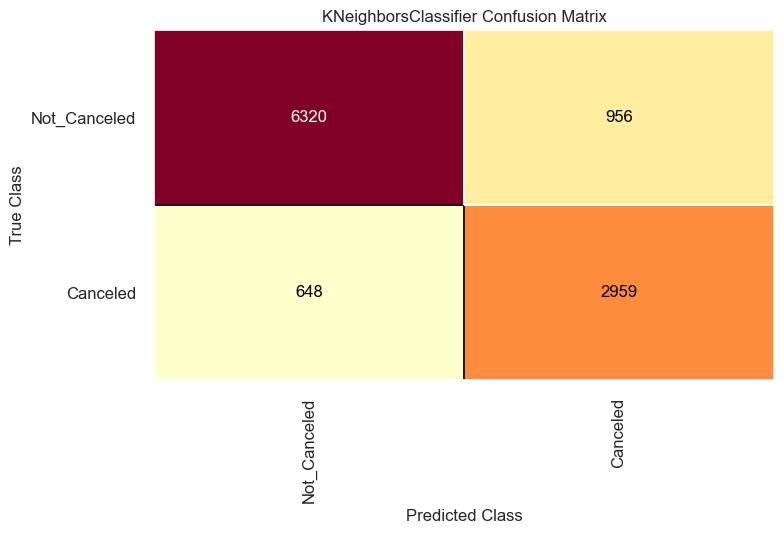

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
# Membuat ConfusionMatrix Visualizer
cm = ConfusionMatrix(pipe_knn, classes=['Not_Canceled', 'Canceled'])

# Melakukan fitting visualizer pada test data
cm.fit(X_train, y_train)

# Melakukan prediksi kelas pada test data
cm.score(X_test, y_test)

# Menggambarkan confusion matrix
cm.show()

In [69]:
print('Roc-Auc Score:',roc_auc_score(y_test, test_preds_knn))

Roc-Auc Score: 0.8444792233292634


#### Analysis

Berdasarkan analisis pada bagian cross-validation mengenai metric yang paling penting, metric yang kita gunakan adalah F1-score. 

Precision mengukur proporsi True Positive di antara semua positif yang diprediksi (True Positive + False Positive). Dalam konteks reservasi hotel, precision akan memberi tahu kita proporsi pembatalan yang diidentifikasi dengan benar di antara semua pelanggan yang diprediksi akan membatalkan. Hal ini penting karena kita ingin dapat mengidentifikasi pembatalan secara akurat sehingga kita dapat mengambil tindakan yang tepat, seperti menawarkan insentif atau mencoba mempertahankan pelanggan.

Recall mengukur proporsi True Positive di antara semua positif yang sebenarnya (True Positive + False Negative). Dalam konteks reservasi hotel, recall akan memberi tahu kita proporsi pembatalan yang teridentifikasi dengan benar di antara semua pelanggan yang benar-benar membatalkan. Hal ini juga penting karena kita ingin dapat mengidentifikasi pembatalan sebanyak mungkin, sehingga kita dapat mengambil tindakan yang tepat untuk meminimalkan dampak pembatalan pada bisnis kita.

Oleh karena itu, kita akan menggunakan metric F1-score yang merupakan harmonic mean dari precision dan recall untuk mengevaluasi kinerja model secara keseluruhan.


Berdasarkan laporan klasifikasi, model KNN mempunyai akurasi cukup baik dalam memprediksi reservasi hotel yang dibatalkan. Akurasi keseluruhan model adalah 0.86, yang menunjukkan bahwa model memprediksi dengan benar 86% dari kasus yang ada.

Precision untuk kelas 0 adalah 0.91, yang berarti bahwa ketika model memprediksi reservasi tidak akan dibatalkan, model tersebut benar 91% secara keseluruhan. Recall untuk kelas 0 adalah 0,87, yang menunjukkan bahwa model mengidentifikasi dengan benar 87% dari reservasi yang tidak dibatalkan.

Untuk kelas 1, nilai precision adalah 0,76, yang berarti bahwa ketika model memprediksi reservasi akan dibatalkan, model tersebut benar 76% secara keseluruhan. Recall untuk kelas 1 adalah 0,82, yang menunjukkan bahwa model mengidentifikasi 82% dari reservasi yang dibatalkan dengan benar.

F1-score adalah ukuran keseimbangan model antara precision dan recall untuk setiap kelas, dengan nilai 1 yang menunjukkan precision dan recall yang sempurna. Nilai F1-score untuk kelas 0 adalah 0.89, dan untuk kelas 1 adalah 0.79.

Nilai ROC-AUC pada model KNN adalah sebesar 0.84, nilai ROC-AUC tersebut menunjukkan bahwa model sudah baik untuk memprediksi kelas booking status secara keseluruhan.

Kesimpulannya, model KNN dapat mengklasifikasi data dengan baik secara keseluruhan dengan nilai F1-score yang cukup tinggi untuk kedua kelas. Namun, masih ada ruang untuk perbaikan, terutama dalam hal meningkatkan precision dan recall untuk kelas 1, karena kelas ini merupakan kelas yang lebih penting untuk diidentifikasi dengan benar agar manajer hotel dapat mengambil keputusan yang tepat mengenai reservasi kamar hotel.

Beberapa metode yang dapat dilakukan untuk meningkatkan akurasi dari model adalah:
- Meningkatkan ukuran dataset pelatihan
- Melakukan hyperparameter tuning dengan parameter yang lebih bervariasi untuk menentukan parameter yang paling optimal
- Eksperimen lebih lanjut dengan feature selection/feature engineering
- Mengumpulkan data tambahan tentang fitur-fitur yang terkait dengan reservasi hotel untuk meningkatkan rasio signal-to-noise dan mengurangi overfitting.

#### Analisis Data True Positive dan True Negative

Pada kasus ini, kita akan memakai kelas 1 sebagai true positive dan kelas 0 sebagai true negative.

Langkah pertama, kita akan melihat ciri-ciri pada true positive dan true negative yang diprediksi oleh model KNN pada test set.

In [93]:
tp = X_test[(y_test == 1) & (test_preds_knn == 1)]
tp = tp[['lead_time','avg_price_per_room','no_of_special_requests','market_segment_type']]
tp = pd.get_dummies(tp)
tp

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
1553,23,127.67,0,0,0,0,1
29145,99,107.10,0,0,0,0,1
263,209,152.10,1,0,0,0,1
5557,166,99.45,0,0,0,0,1
926,28,126.00,0,0,0,0,1
...,...,...,...,...,...,...,...
2005,257,101.50,0,0,0,0,1
30100,15,139.00,0,0,0,0,1
1106,11,143.33,0,0,0,0,1
27776,181,120.00,0,0,0,1,0


In [94]:
tp.describe()

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
count,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000
mean,156.353836,110.840379,0.264954,0.001352,0.011490,0.304833,0.682325
std,99.307202,32.789567,0.541164,0.036748,0.106594,0.460414,0.465651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,155.000000,108.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,230.000000,124.200000,0.000000,0.000000,0.000000,1.000000,1.000000
max,443.000000,540.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
tn = X_test[(y_test == 0) & (test_preds_knn == 0)]
tn = tn[['lead_time','avg_price_per_room','no_of_special_requests','market_segment_type']]
tn = pd.get_dummies(tn)
tn

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
4968,3,90.00,3,0,0,0,0,1
34540,9,48.67,0,0,0,0,1,0
36108,24,95.20,1,0,0,0,0,1
24974,9,201.50,2,0,0,0,0,1
27079,102,109.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
18305,19,69.00,0,0,0,0,0,1
29021,132,72.25,0,0,0,0,1,0
17795,42,88.00,2,0,0,0,0,1
29685,42,94.50,0,0,0,0,1,0


In [97]:
tn.describe()

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
count,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,54.462025,98.471237,0.809019,0.003006,0.018829,0.080854,0.327848,0.569462
std,62.002518,36.079721,0.853994,0.054752,0.135932,0.272633,0.469466,0.495191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,76.257500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,94.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,118.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,359.000000,294.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Berdasarkan output diatas, kita dapat melihat bahwa perbedaan yang paling besar terhadap klasifikasi true positive dan true negative adalah nilai lead_time dan no_of_special_requests. Pada data true negative, kita melihat bahwa lead_time mempunyai rata-rata yang rendah dengan no_of_special_requests yang tinggi. Hal ini menunjukkan bahwa apabila pelanggan melakukan reservasi dengan waktu arrival yang cepat dan mempunyai banyak pesanan khusus, maka pelanggan akan lebih sering untuk tidak membatalkan reservasi

Sedangkan untuk data true positive, hal yang sebaliknya berlaku dari true negative. Dimana nilai lead_time mempunyai rata-rata yang tinggi dengan no_of_special_requests yang rendah. Hal ini menunjukkan bahwa apabila pelanggan melakukan reservasi dari waktu yang lama dan tidak melakukan pesanan khusus, maka pelanggan akan lebih sering untuk membatalkan reservasi.

#### Analisis Data False Positive

In [98]:
fp = X_test[(y_test == 0) & (test_preds_knn == 1)]
fp = fp[['lead_time','avg_price_per_room','no_of_special_requests','market_segment_type']]
fp = pd.get_dummies(fp)
fp

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
27152,72,116.10,1,0,0,0,1
7615,26,133.00,0,0,0,0,1
7577,54,95.36,0,0,0,0,1
83,40,98.82,0,0,0,0,1
2265,64,68.61,1,0,0,0,1
...,...,...,...,...,...,...,...
27145,260,95.13,1,0,0,0,1
9091,65,63.58,0,0,0,0,1
25975,25,119.00,1,0,0,0,1
26597,25,77.77,0,0,0,0,1


In [99]:
fp.describe()

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,75.875523,109.515983,0.439331,0.007322,0.020921,0.101464,0.870293
std,62.821664,32.930286,0.603204,0.085300,0.143193,0.302101,0.336157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,85.252500,0.000000,0.000000,0.000000,0.000000,1.000000
50%,65.000000,103.950000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,109.000000,131.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,348.000000,235.500000,2.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'FP lead_time vs avg_price_per_room')

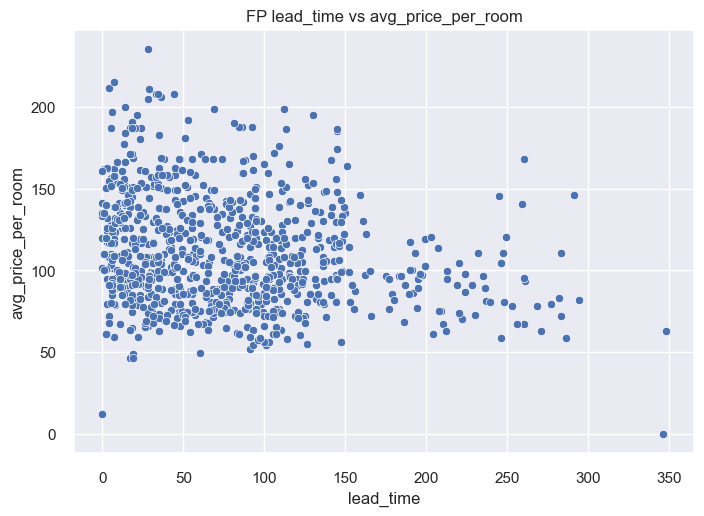

In [128]:
sns.scatterplot(data=fp, x="lead_time", y="avg_price_per_room").set_title('FP lead_time vs avg_price_per_room')

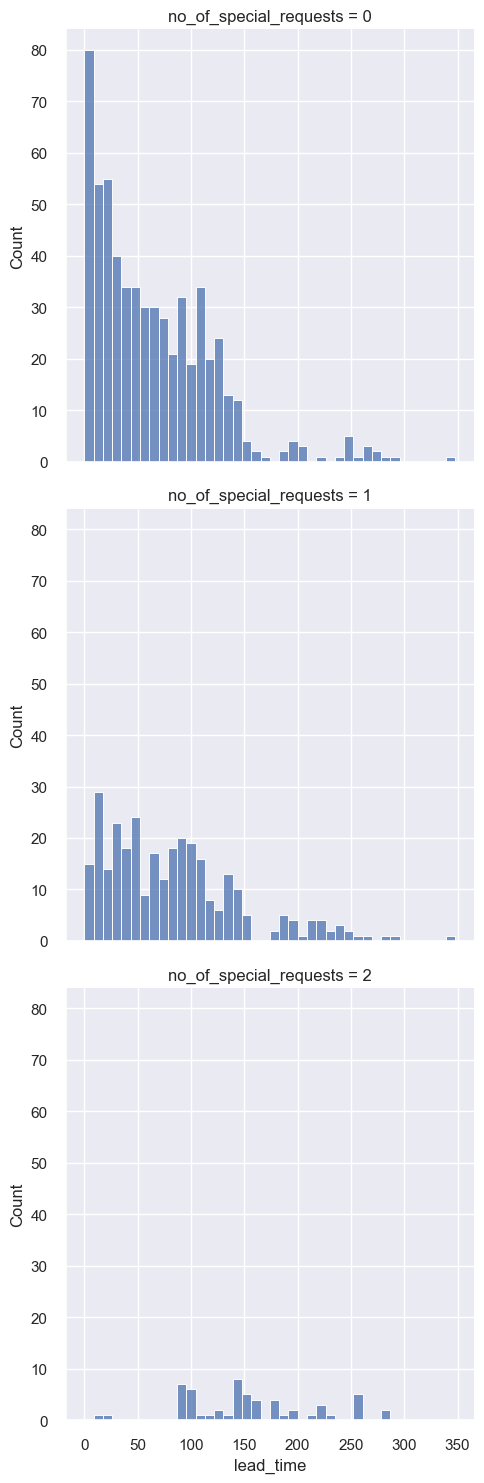

In [126]:
sns.displot(data=fp, x='lead_time', row='no_of_special_requests', bins=40, kind='hist')

Berdasarkan visualisasi dan mean dari false positive, kita dapat menyimpulkan bahwa ciri-ciri data false positive merupakan data dengan jumlah no_of_special_requests yang sedikit lebih banyak dari true positive dengan lead time yang sedikit lebih tinggi dari true negative. Sehingga, model menganggap bahwa perbedaan yang sedikit pada kedua kolom tersebut menyebabkan terjadinya misklasifikasi pada data yang negative (Not_Cancelled) menjadi false positive (Cancelled).

#### Analisis Data False Negative

In [100]:
fn = X_test[(y_test == 1) & (test_preds_knn == 0)]
fn = fn[['lead_time','avg_price_per_room','no_of_special_requests','market_segment_type']]
fn = pd.get_dummies(fn)
fn

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
17656,116,101.58,1,0,0,0,1
10004,181,85.50,1,0,0,0,1
34986,32,88.00,0,0,0,0,1
22390,57,86.40,1,0,0,0,1
16319,139,72.25,0,0,0,1,0
...,...,...,...,...,...,...,...
11527,37,132.84,1,0,0,0,1
21047,82,134.10,1,0,0,0,1
32521,141,75.00,0,0,0,1,0
34138,86,100.00,0,0,1,0,0


In [101]:
fn.describe()

,lead_time,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,67.367284,106.429074,0.711420,0.015432,0.038580,0.091049,0.854938
std,64.501232,31.423608,0.630296,0.123359,0.192741,0.287902,0.352435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.750000,81.640000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,99.450000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,98.250000,126.900000,1.000000,0.000000,0.000000,0.000000,1.000000
max,386.000000,231.000000,2.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'FN lead_time vs avg_price_per_room')

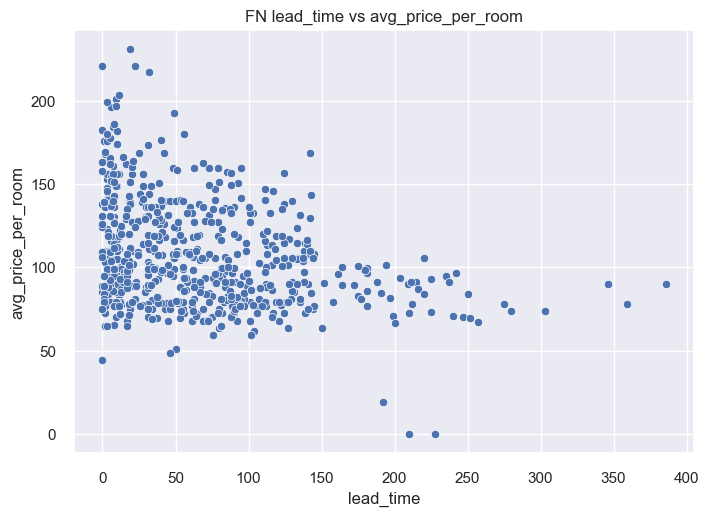

In [127]:
sns.scatterplot(data=fn, x="lead_time", y="avg_price_per_room").set_title('FN lead_time vs avg_price_per_room')

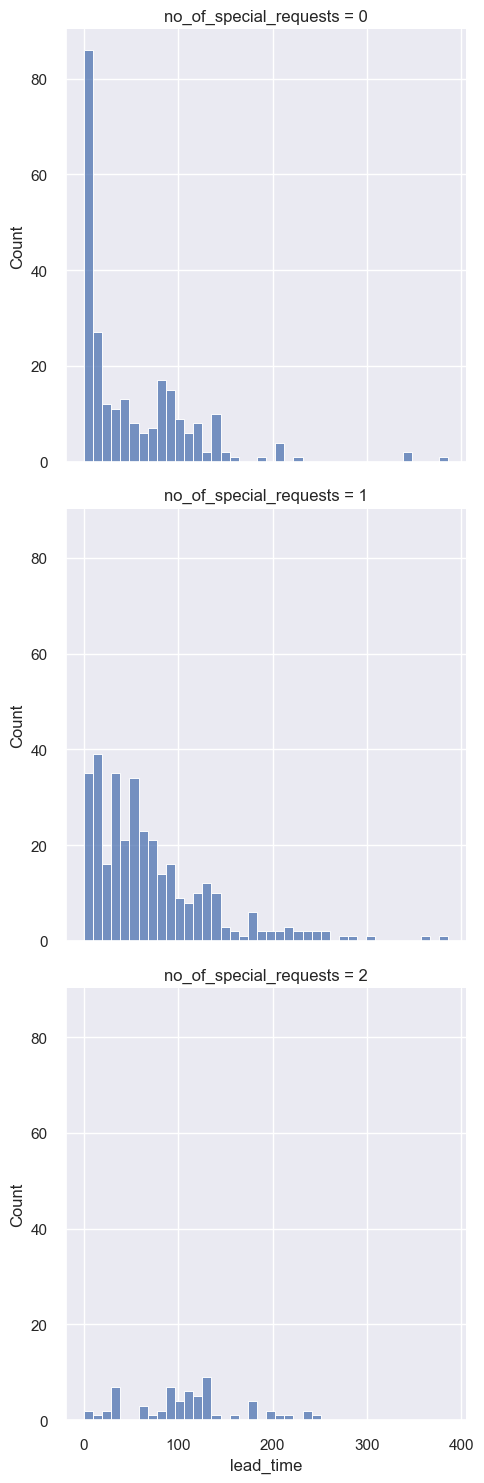

In [125]:
sns.displot(data=fn, x='lead_time', row='no_of_special_requests', kind='hist',bins=40)

Berdasarkan rata-rata dan visualisasi dari false negative, kita dapat menyimpulkan bahwa faktor utama yang mempengaruhi terjadinya false negative adalah data dengan nilai lead time yang sedikit lebih tinggi dari true negative dan nilai avg price per room yang lebih tinggi dari true negative. Sehingga model melakukan misklasifikasi data yang positif (Cancelled) menjadi false negative (Not_Cancelled).

Kesimpulannya, walaupun model mampu memprediksi kemungkinan pelanggan untuk membatalkan reservasinya, pasti akan ada beberapa data dimana yang seharusnya diprediksi membatalkan pelanggan tersebut sebenarnya tidak membatalkan dan sebaliknya. Hal ini dapat disebabkan oleh faktor eksternal yang tidak dapat kita kontrol, seperti kejadian mendesak oleh pelanggan (e.g ada keluarga yang tiba-tiba jatuh sakit sehingga tidak bisa jalan-jalan, dan reservasi hotelnya dibatalkan). Sehingga, kita harus selalu siap dengan adanya terjadi misklasifikasi dan beradaptasi sesuai dengan kondisi hotel. 

## Model Saving

In [67]:
joblib.dump(pipe_knn,'KNN.pkl')

['KNN.pkl']

## Model Inference

Inference akan dilakukan di file "M2 Inference.ipynb"

## Pengambilan Kesimpulan

Kesimpulan yang dapat diambil dari notebook dan analisis ini adalah:
- Notebook ini bertujuan untuk memprediksi apakah pelanggan akan membatalkan reservasinya menggunakan model K-Nearest Neighbor, Gaussian Naive Bayes, Decision Tree, dan Random Forest Classifier. Pada kasus ini, model harus memfokuskan nilai metric f1-score yang tinggi, sehingga dengan metric tersebut model KNN digunakan karena model tersebut mempunyai nilai f1-score yang paling tinggi.

- Feature yang paling mempengaruhi klasifikasi pembatalan reservasi adalah lead time, average price per room, market segment, dan number of special requests.

- Model KNN mendapatkan nilai precision, recall, f1-score dan akurasi rata-rata sebesar: 0.83, 0.83, 0.84, dan 0.85. Dengan nilai ROC-AUC sebesar 0.844. Hal ini menunjukkan bahwa model sudah cukup akurat untuk mengklasifikasi apakah pelanggan akan membatalkan reservasi hotelnya.